### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [60]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv') 

# Print & View the DataFrame.
print(reviews.info())
reviews.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [61]:
# Any missing values?
# Replace the missing values with 0.
reviews.fillna(0, inplace=True)

# Determine the number of missing values.
print (reviews.isna().sum())
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [62]:
# Explore the data.
reviews.drop_duplicates()
print (reviews.shape)
print(reviews.value_counts())

(2000, 11)
gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  education     language  platform  product  review                                                                                                                                                                               summary          
Female  17   13.94              40                      233             postgraduate  EN        Web       7573     My son (8) and daughter (11) were and still are intrigued by this toy                                                                                                                Five Stars           1
Male    29   22.96              82                      1150            postgraduate  EN        Web       2261     Fun game. A little complicated, but fun once you understand how it works.                                                                                                            Five Stars           1
             71.34              13   

In [63]:
# Descriptive statistics.
reviews.describe() 

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [64]:
# Drop unnecessary columns.
reviews.drop(['language', 'platform'], axis=1, inplace=True)

# View column names.
reviews.columns.values
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [65]:
# Rename the column headers.
reviews.rename(columns={"remuneration (k£)": "renumeration", "spending_score (1-100)": "spending_score"}, inplace=True)

# View column names.
reviews.columns.values

array(['gender', 'age', 'renumeration', 'spending_score',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype=object)

## 4. Save the DataFrame as a CSV file

In [66]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)

In [2]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('turtle_reviews_clean.csv') 

# View DataFrame.
reviews.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
#Check correlation between values to get a general idea
reviews.corr()

,age,renumeration,spending_score,loyalty_points,product
age,1.000000,-0.005708,-0.224334,-0.042445,0.003081
renumeration,-0.005708,1.000000,0.005612,0.616065,0.305309
spending_score,-0.224334,0.005612,1.000000,0.672310,-0.001649
loyalty_points,-0.042445,0.616065,0.672310,1.000000,0.183600
product,0.003081,0.305309,-0.001649,0.183600,1.000000


***REMEMBER CORRRELATION DOES NOT IMPLY CAUSATION**</br>
Since we work with a sample of data, if we obtain a different sample it’s possible we could have different correlation scores.</br>
As such we need to assess the significance of the correlation values we calculated, which depends on the sample size. 

## 5. Linear regression

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):          2.92e-263
Time:                        11:17:40   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4260      0.685     41.504      0.000      27.083      29.769
x1             0.0137      0.000     40.595      0.000       0.013       0.014
==============================================================================
Omnibus:                      169.397   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.607
Skew:                           0.768   Prob(JB):                     6.81e-47
Kurtosis:                       3.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

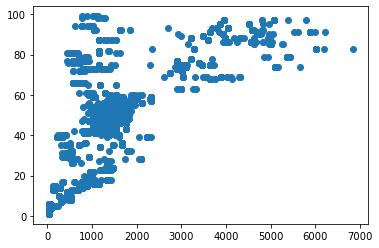

In [7]:
# Independent variable/explanatory.
x1=reviews['loyalty_points']

# Dependent variable/response.
y1=reviews['spending_score']

# Check for linearity with Matplotlib.
plt.scatter(x1, y1)

# OLS model and summary.
# Create formula and pass through OLS methods.
f1 = 'y1 ~ x1'
model1 = ols(f1, data = reviews).fit()

# View the output.
model1.summary()

In [8]:
# Extract the estimated parameters.
print("Parameters: ", model1.params)  

# Extract the standard errors.
print("Standard errors: ", model1.bse)

# Extract the predicted values.
print("Predicted values: ", model1.predict()) 

Parameters:  Intercept    28.426033
x1            0.013671
dtype: float64
Standard errors:  Intercept    0.684905
x1           0.000337
dtype: float64
Predicted values:  [ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]


In [9]:
# Set the X coefficient to 28.426 and the constant to 0.0137 generate the regression table.
y_pred1 = 28.426 + 0.0137 * reviews['loyalty_points']

# View the output.
y_pred1

0        31.3030
1        35.6048
2        28.9740
3        36.1254
4        33.4402
          ...   
1995     83.6507
1996     35.8103
1997    105.3378
1998     42.7836
1999     34.9883
Name: loyalty_points, Length: 2000, dtype: float64

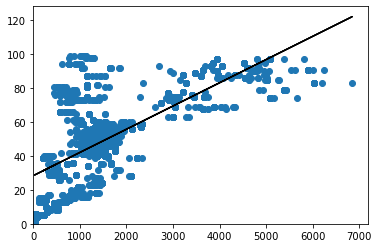

In [10]:
# Plot the data points with a scatterplot.
plt.scatter(x1, y1)

# Plot the regression line (in black).
plt.plot(x1, y_pred1, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):          2.43e-209
Time:                        11:19:28   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5606      0.646     47.321      0.000      29.294      31.827
x2             0.0111      0.000     34.960      0.000       0.010       0.012
==============================================================================
Omnibus:                      382.801   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.257
Skew:                           1.230   Prob(JB):                    1.90e-143
Kurtosis:                       4.357   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

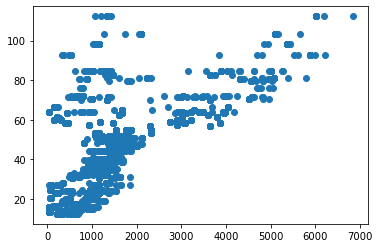

In [11]:
# Independent variable/explanatory.
x2=reviews['loyalty_points']

# Dependent variable/response.
y2=reviews['renumeration']

# Check for linearity with Matplotlib.
plt.scatter(x2, y2)

# OLS model and summary.
# Create formula and pass through OLS methods.
f2 = 'y2 ~ x2'
model2 = ols(f2, data = reviews).fit()

# View the output.
model2.summary()

In [12]:
# Extract the estimated parameters.
print("Parameters: ", model2.params)  

# Extract the standard errors.
print("Standard errors: ", model2.bse)

# Extract the predicted values.
print("Predicted values: ", model2.predict()) 

Parameters:  Intercept    30.560555
x2            0.011101
dtype: float64
Standard errors:  Intercept    0.645817
x2           0.000318
dtype: float64
Predicted values:  [32.89186761 36.3777352  31.00461446 ... 92.88431491 42.19491551
 35.87816819]


In [13]:
# Set the X coefficient to 30.5605 and the constant to 0.0111 generate the regression table.
y_pred2 = 30.5606 + 0.0111 * reviews['loyalty_points']

# View the output.
y_pred2.sort_values (ascending=False)

1871    106.5623
1986     99.7358
1769     99.4694
1706     97.3826
1399     97.3826
          ...   
1008     30.9047
408      30.9047
608      30.9047
1809     30.8936
1401     30.8381
Name: loyalty_points, Length: 2000, dtype: float64

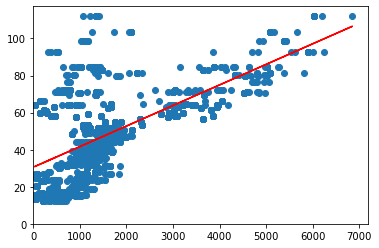

In [14]:
# Plot the data points with a scatterplot.
plt.scatter(x2, y2)

# Plot the regression line (in black).
plt.plot(x2, y_pred2, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0577
Time:                        11:20:59   Log-Likelihood:                -8051.8
No. Observations:                2000   AIC:                         1.611e+04
Df Residuals:                    1998   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2035      0.481     83.615      0.000      39.261      41.146
x3            -0.0004      0.000     -1.899      0.058      -0.001    1.47e-05
==============================================================================
Omnibus:                       99.357   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.564
Skew:                           0.574   Prob(JB):                     3.61e-25
Kurtosis:                       2.814   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

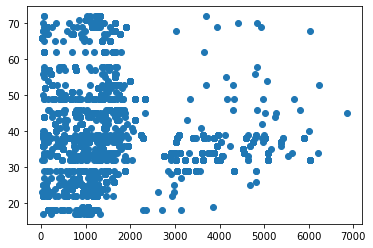

In [15]:
# Independent variable/explanatory.
x3=reviews['loyalty_points']

# Dependent variable/response.
y3=reviews['age']

# Check for linearity with Matplotlib.
plt.scatter(x3, y3)

# OLS model and summary.
# Create formula and pass through OLS methods.
f3 = 'y3 ~ x3'
model3 = ols(f3, data = reviews).fit()

# View the output.
model3.summary()

In [16]:
# Extract the estimated parameters.
print("Parameters: ", model3.params)  

# Extract the standard errors.
print("Standard errors: ", model3.bse)

# Extract the predicted values.
print("Predicted values: ", model3.predict()) 

Parameters:  Intercept    40.203457
x3           -0.000449
dtype: float64
Standard errors:  Intercept    0.480816
x3           0.000236
dtype: float64
Predicted values:  [40.10917768 39.96820745 40.18549915 ... 37.683053   39.73295776
 39.98841019]


In [17]:
# Set the X coefficient to 40.2034 and the constant to -0.0004 generate the regression table.
#Linear Regression reminder y = mx + b. 
y_pred3 = 40.2034 + (-0.0004) * reviews['loyalty_points']

# View the output.
y_pred3

0       40.1194
1       39.9938
2       40.1874
3       39.9786
4       40.0570
         ...   
1995    38.5910
1996    39.9878
1997    37.9578
1998    39.7842
1999    40.0118
Name: loyalty_points, Length: 2000, dtype: float64

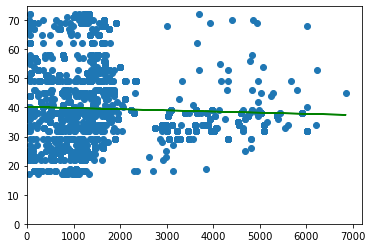

In [58]:
# Plot the data points with a scatterplot.
plt.scatter(x3, y3)

# Plot the regression line (in black).
plt.plot(x3, y_pred3, color='green')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

## 6. Observations and insights

## Case1 - Spending vs loyalty points
> - $R^2$: 45% of the total variability of `y` (spending score), is explained by the variability of `X` (how many purchases done).  
> - F-stat:is very high but p-value is very low (2.92e -263) as such greater the statistical significance. 
> - `X`: The coefficient of `X` tells us, if the length that the customer has been a member (`X`) changes by 1 unit (please check units used) the money spent (`y`) will change by 64.2187 units (spending score assigned). 
>  - The `t`-value being at 41.5 shows that slope is not significant.

## Case2 - Renumeration vs loyalty points
> - $R^2$: 38% of the total variability of `y` (total income of each customer per year), is explained by the variability of `X` (how many purchases done).  
> - F-stat:is very high but p-value is very low as such greater the statistical significance. 
> - `X`: The coefficient of `X` shows if the length that the customer has been a member (`X`) changes by 1 unit (ie loyalty point) the money he should be earning (`y`) will change by 30.56 units (k =1000 GBP). 
>  - The `t`-value being at 47 shows that slope is not significant.

## Case 3 - Age vs loyalty points

> - $R^2$: 0.2% of the total variability of `y` (age), is explained by the variability of `X` (how many purchased they have done).  
> - No need to investigate further as it looks that suggested model is not successful

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file(s) as df2.
# Import new CSV file with Pandas.
df1 = pd.read_csv('turtle_reviews_clean.csv', index_col=False) 

# View DataFrame.
print (df1.info())
df1.head ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Drop unnecessary columns.
df2 = pd.DataFrame(df1, columns=['renumeration', 'spending_score'])


In [4]:
# View column names and Dataframe
print (df2.columns.values)
df2.head()

['renumeration' 'spending_score']


,renumeration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [5]:
# Explore the data.
df2.drop_duplicates()
print (df2.shape)
print(df2.value_counts())

(2000, 2)
renumeration  spending_score
39.36         59                21
32.80         42                20
92.66         8                 16
63.96         1                 16
84.46         69                15
                                ..
60.68         72                 7
56.58         91                 7
              58                 7
54.94         57                 7
57.40         29                 7
Length: 196, dtype: int64


In [6]:
# Descriptive statistics.
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
renumeration,2000.0,48.07906,23.123984,12.3,30.34,47.15,63.96,112.34
spending_score,2000.0,50.00000,26.094702,1.0,32.00,50.00,73.00,99.00


## SCALING
No scaling is required as comparable variables are aligned in terms of values</br>
and both lie on the same scale without one over-shadowing the other

In [7]:
#Check correlation between values to get a general idea
df2.corr()

,renumeration,spending_score
renumeration,1.000000,0.005612
spending_score,0.005612,1.000000


## 2. Plot

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

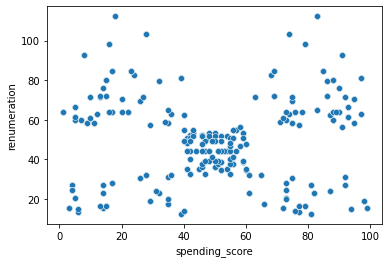

In [30]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score',
                y='renumeration',
                data=df2)

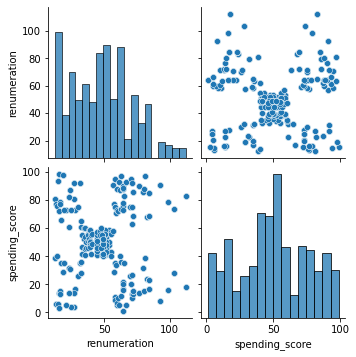

In [32]:
# Create a pairplot with Seaborn.
sns.pairplot(df2)

## 3. Elbow and silhoutte methods

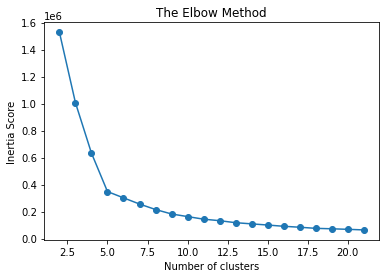

In [23]:
# Determine the number of clusters: Elbow method.
sum_squar = []
for i in range(2, 22):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df2)
    sum_squar.append(kmeans.inertia_)

# Plot the elbow method. Plots the sum of squared distances from 
#each point to its assigned centre.
plt.plot(range(2, 22),
         sum_squar,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")

plt.show()

Elbow method above shows that the WSS starts to diminish basis 5 or 6 clusters

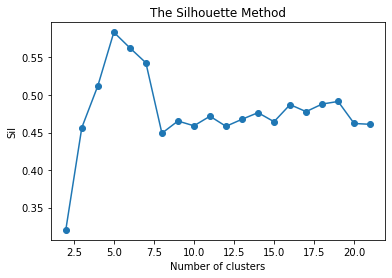

In [24]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 21

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Silhouette Method confirmes elbow that figure should be around 5 or 6

## 4. Evaluate k-means model at different values of *k*

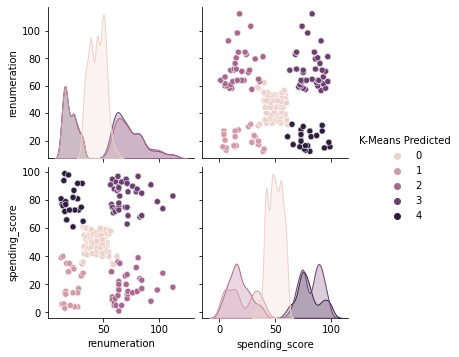

In [47]:
# We will run a first evaluation bss k=5
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [48]:
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

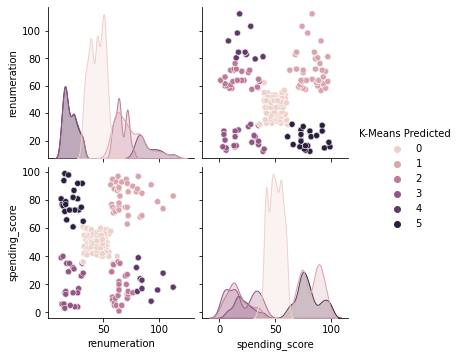

In [49]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [50]:
df2['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

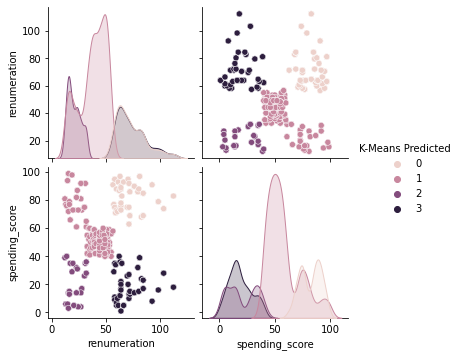

In [51]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [52]:
df2['K-Means Predicted'].value_counts()

1    1013
0     356
3     351
2     280
Name: K-Means Predicted, dtype: int64

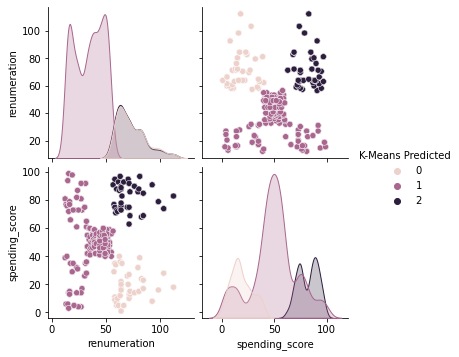

In [53]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

Basis above testing we will fit the model basis 5 clusters which gives the more balanced predicted results</br> 
as also distinctly useful groupes in the renumeration diagrams.

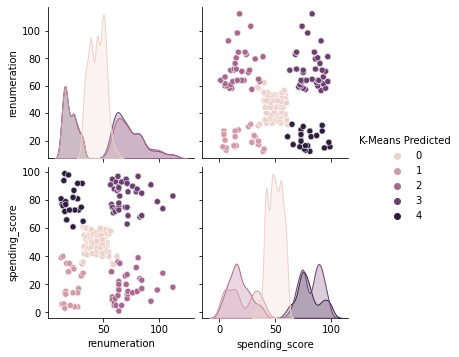

In [25]:
# Apply the final model.
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df2)

clusters = kmeans.labels_

df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [26]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()


0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  2
1         12.30              81                  2
2         13.12               6                  2
3         13.12              77                  2
4         13.94              40                  2


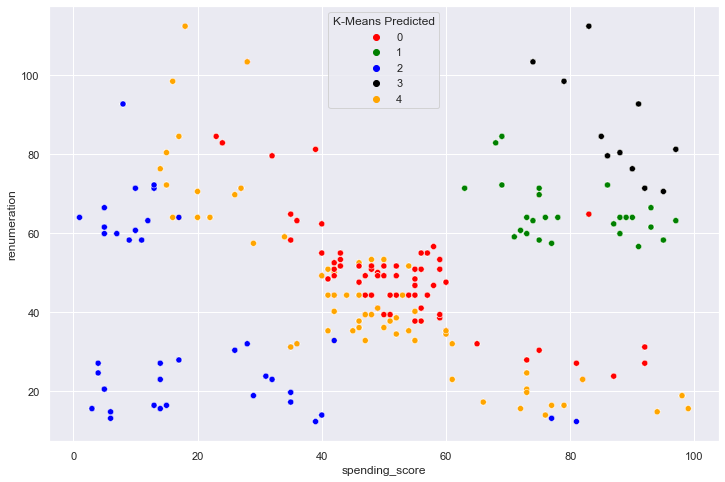

In [54]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending_score',
                y='renumeration',
                data=df2 , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# View the DataFrame.
print(df2.head())

## (EXPERIMENTING WITH MORE VARIABLES)

In [47]:
df1.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [48]:
#Work with 4 variables to check whether 5 clusters give same business context
# Drop unnecessary columns.
df_test = pd.DataFrame(df1, columns=['age', 'renumeration', 'spending_score', 'loyalty_points'])
df_test.head()


,age,renumeration,spending_score,loyalty_points
0,18,12.30,39,210
1,23,12.30,81,524
2,22,13.12,6,40
3,25,13.12,77,562
4,33,13.94,40,366


In [70]:
#We will require to scale the data due mainly to loyalty_points field

from sklearn.preprocessing import MinMaxScaler

# creating a copy to keep original df as is for later
df3_clust = df_test.copy()

cols_scale = ['age','renumeration','spending_score','loyalty_points']

scaler = MinMaxScaler().fit(df3_clust[cols_scale])
df3_clust[cols_scale] = scaler.transform(df3_clust[cols_scale])

In [71]:
# Descriptive statistics.
df3_clust.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2000.0,0.409000,0.246786,0.0,0.218182,0.381818,0.581818,1.0
renumeration,2000.0,0.357648,0.231147,0.0,0.180328,0.348361,0.516393,1.0
spending_score,2000.0,0.500000,0.266272,0.0,0.316327,0.500000,0.734694,1.0
loyalty_points,2000.0,0.227651,0.188103,0.0,0.109499,0.183377,0.253042,1.0
K-Means Predicted,2000.0,1.859500,1.504956,0.0,0.000000,2.000000,3.000000,5.0


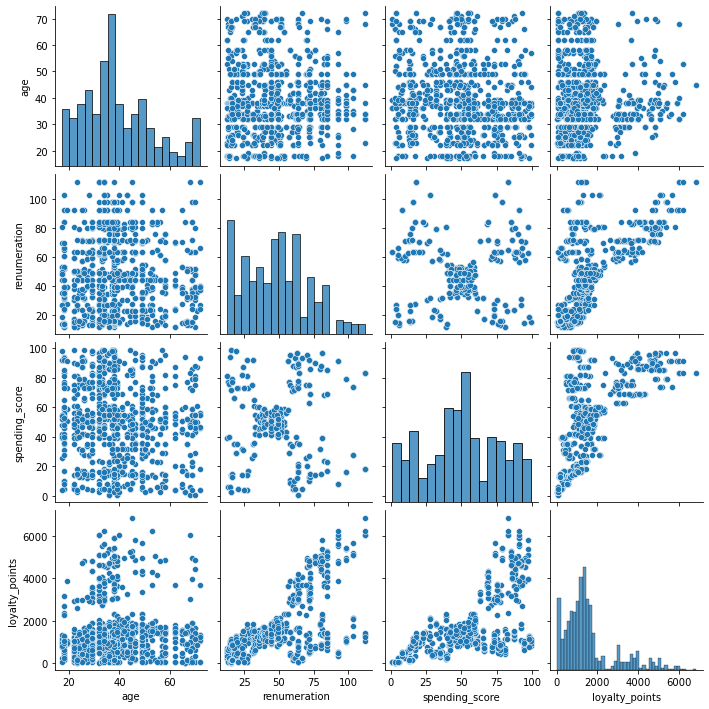

In [50]:
# Create a pairplot with Seaborn.
sns.pairplot(df3)

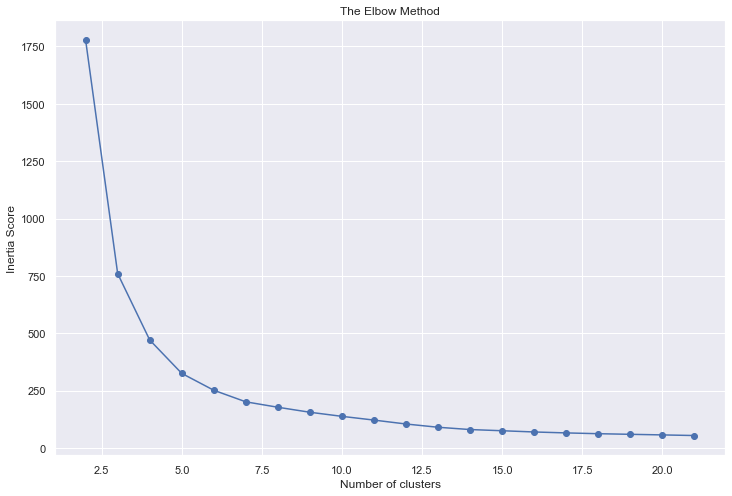

In [72]:
# Determine the number of clusters: Elbow method.
sum_squar = []
for i in range(2, 22):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=0)
    kmeans.fit(df3_clust)
    sum_squar.append(kmeans.inertia_)

# Plot the elbow method. Plots the sum of squared distances from 
#each point to its assigned centre.
plt.plot(range(2, 22),
         sum_squar,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")

plt.show()

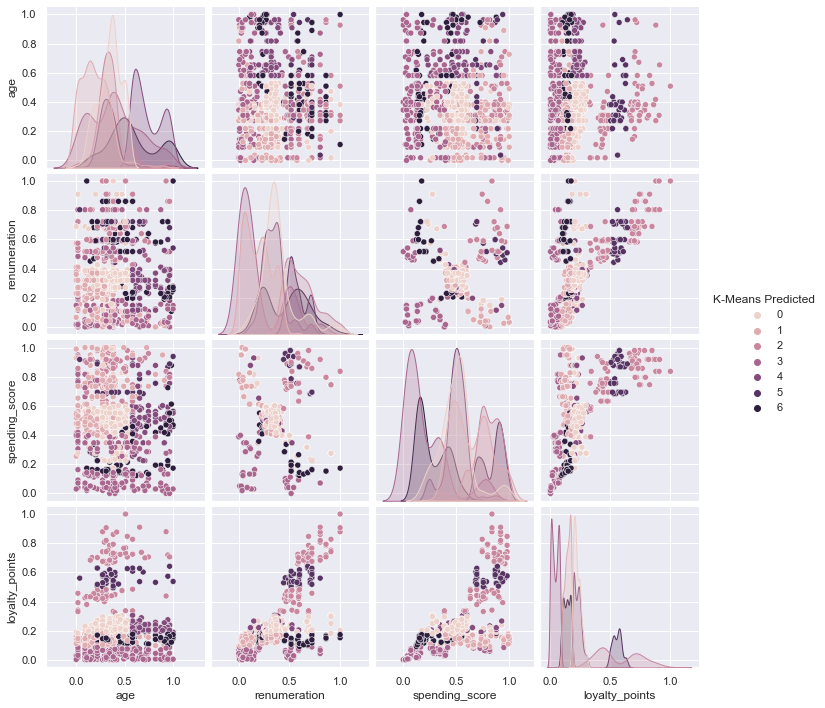

In [77]:
# Run kmeans  bss k=7
kmeans = KMeans(n_clusters = 7, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(df3_clust)

clusters = kmeans.labels_

df3_clust['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df3_clust,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [78]:
# Check the number of observations per predicted class.
df3_clust['K-Means Predicted'].value_counts()

3    402
0    365
1    361
4    259
2    248
6    228
5    137
Name: K-Means Predicted, dtype: int64

        age  renumeration  spending_score  loyalty_points  K-Means Predicted
0  0.018182      0.000000        0.387755        0.027118                  3
1  0.109091      0.000000        0.816327        0.073146                  3
2  0.090909      0.008197        0.051020        0.002199                  3
3  0.145455      0.008197        0.775510        0.078716                  3
4  0.290909      0.016393        0.397959        0.049985                  3


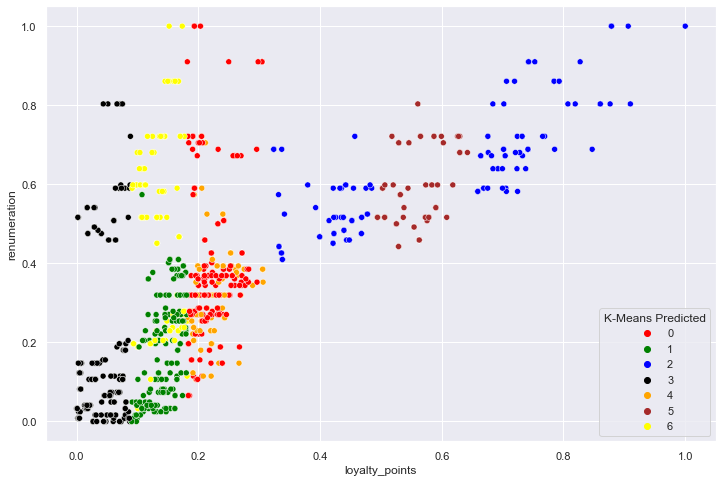

In [81]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='loyalty_points',
                y='renumeration',
                data=df3_clust , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'brown', 'yellow'])

# View the DataFrame.
print(df3_clust.head())

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

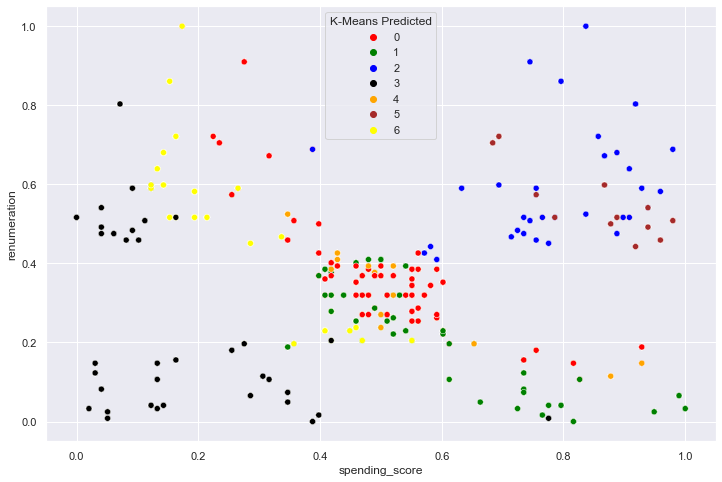

In [82]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending_score',
                y='renumeration',
                data=df3_clust , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'brown', 'yellow'])

<AxesSubplot:xlabel='spending_score', ylabel='loyalty_points'>

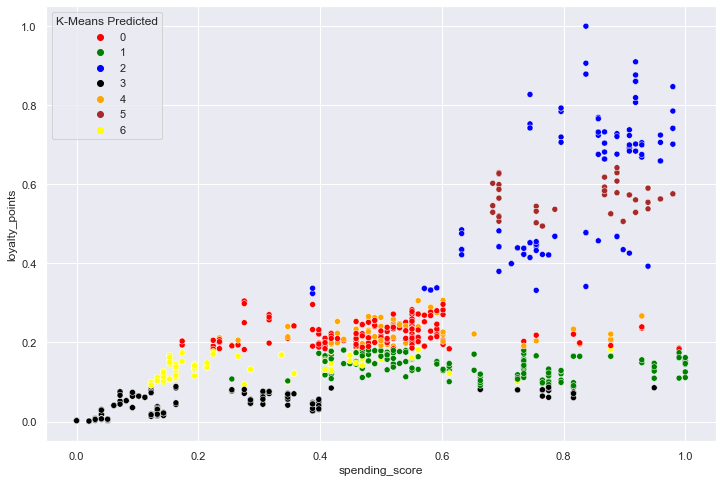

In [83]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending_score',
                y='loyalty_points',
                data=df3_clust , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'brown', 'yellow'])

## (RESULTS OF EXPERIMENT)
It seems that adding the additional fields did not provide the clarification or extra insight we were after

## 7. Discuss: Insights and observations
In order to give some business context in the analysis above, we can translate our 4 clusters in following profiles: </br>
**1.The low key - logicals** - Starting from the bottom left, cluster group 1 (GREEN) represents our customers with low yearly renumeration that </br>
spend according to their budget and can stress until limits of following category </br>
**2. Our average Joe - middle class** - Middle class, cluster group 0 (RED) not necessarily justifies her name due to renumeration classification in our plot </br>
but view that a big chunk of our datapoints are centered between an average of 40-60 spending score as well as renumeration</br>
**3. The high earners - savers** - Representing cluster group 2 (BLUE), where we can see individuals with mid and high earnings but keeping same </br>
spending score as individuals earning 1/3 of their yearly income</br>
**4. The high earners - Big Spenders** - Cluster group 3 (BLACK) could represent our high profile VIP customers base</br>
which seem to earn a considerable high year income and spend it accordingly or (relationaly) to our store</br>
**5. The high spenders - Low Earners** - Cluster group4 (ORANGE) representing the fidele clientele our clientele that even</br>
with low to moderated yearly renumeration their spending score equals and in certain cases surpases individuals with 2 or 3 more times their year income

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [85]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import string
string.punctuation

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import words
from textblob import TextBlob
from scipy.stats import norm
stop_words = set(stopwords.words('english'))
# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mikeb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mikeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
# Load the data set as df_NLP.
# Import new CSV file with Pandas.
df_NLP = pd.read_csv('turtle_reviews_clean.csv', index_col=False) 

# View DataFrame.
print (df_NLP.info())
df_NLP.head ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [60]:
# Explore data set.
# Drop the empty rows.
df_NLP.dropna(inplace=True)
#Drop Duplicates
df_NLP.drop_duplicates()
#View the df
print (df_NLP.shape)
print(df_NLP.value_counts())

(2000, 9)
gender  age  renumeration  spending_score  loyalty_points  education     product  review                                                                                                                                                                               summary          
Female  17   13.94         40              233             postgraduate  7573     My son (8) and daughter (11) were and still are intrigued by this toy                                                                                                                Five Stars           1
Male    29   22.96         82              1150            postgraduate  2261     Fun game. A little complicated, but fun once you understand how it works.                                                                                                            Five Stars           1
             71.34         13              567             graduate      7373     They're nice, big, colorful stickers.  You don't get ve

In [61]:
# Keep necessary columns. Drop unnecessary columns.
df3 = pd.DataFrame(df_NLP, columns=['review', 'summary'])

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [62]:
# Determine if there are any missing values.
print (df3.isna().sum())
df3.isnull().sum()

review     0
summary    0
dtype: int64


review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [63]:
#Copy to prepare
df3new = df3.copy ()

In [64]:
# Review: Change all to lower case and join with a space.
df3new['review'] = df3new['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Check column
df3new['review'].head()


0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [65]:
# Summary: Change all to lower case and join with a space.
df3new['summary'] = df3new['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Check column
df3new['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [66]:
df3new.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [67]:
# Replace all the punctuations in review column.
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df3new['review'] = df3new['review'].apply(lambda x:remove_punctuation(x))


# View output.
df3new.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon master's screen from...
2,nice art nice printing why two panels are fill...,"pretty, but also pretty useless"
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [68]:
# Replace all the puncuations in summary column.
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df3new['summary'] = df3new['summary'].apply(lambda x:remove_punctuation(x))


# View output.
df3new.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


### 2c) Drop duplicates in both columns

In [69]:
df3new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [70]:
#Count Duplicates
df3new['review'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998     True
1999    False
Name: review, Length: 2000, dtype: bool

In [71]:
# Drop duplicates in both columns.
df3=df3new.drop_duplicates()


In [73]:
#View new df
print (df3.shape)
df3.head()

(1961, 2)


,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


We note that we found 39 duplicated records 

In [79]:
#Re-index df
df3.reset_index(inplace=True)
df3.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [80]:
# Create new DataFrame (copy DataFrame).
df4=df3.copy()

# View DataFrame.
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [81]:
# Apply tokenisation to both columns.
# Tokenise review
df4['rev_tokens'] = df4['review'].apply(word_tokenize)

# Preview data.
df4['rev_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: rev_tokens, dtype: object

In [82]:
# Tokenise review
df4['sum_tokens'] = df4['summary'].apply(word_tokenize)

# Preview data.
df4['sum_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: sum_tokens, dtype: object

In [83]:
# Review: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
rev_cloud = ''
for i in range(df4.shape[0]):
    # Add each comment.
    rev_cloud = rev_cloud + df4['review'][i]

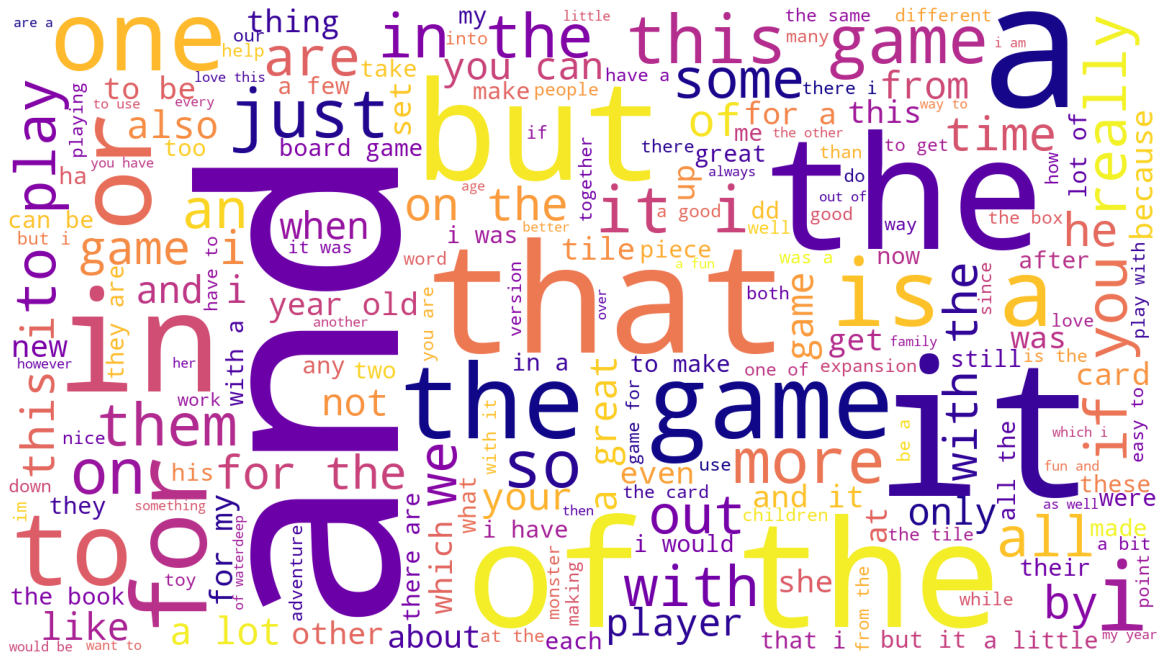

In [87]:
# Review: Plot the WordCloud image.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_rev = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(rev_cloud) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_rev) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


In [88]:
# Summary: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
sum_cloud = ''
for i in range(df4.shape[0]):
    # Add each comment.
    sum_cloud = sum_cloud + df4['summary'][i]

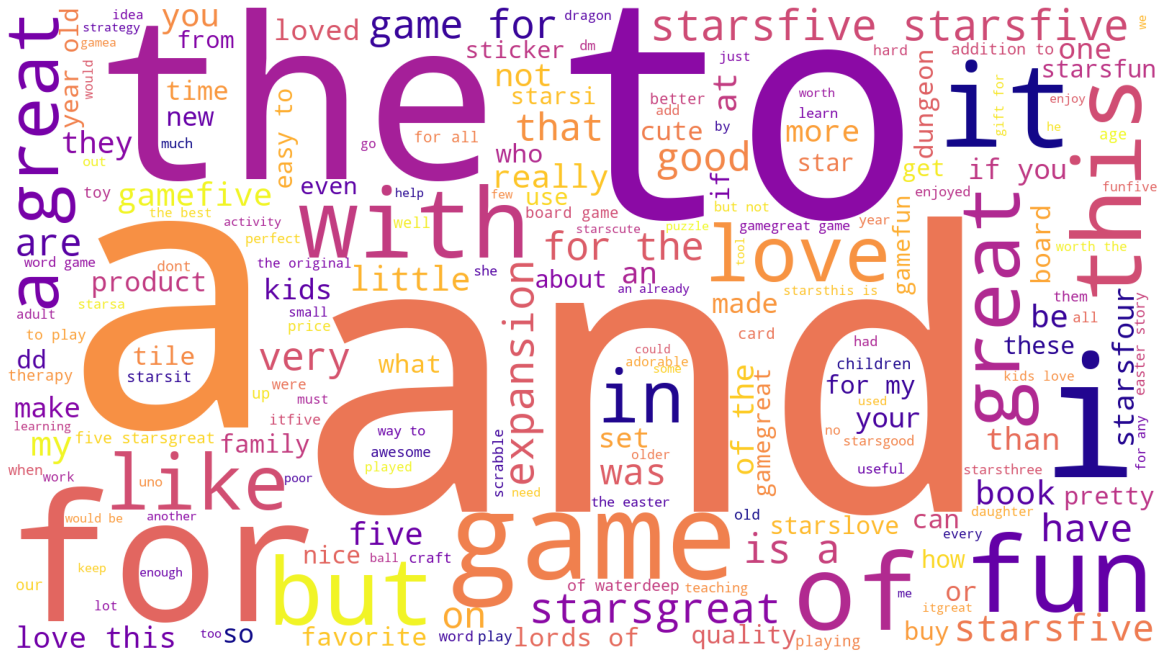

In [89]:
# Summary: Plot the WordCloud image.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_sum = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(sum_cloud) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_sum) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [93]:
# Determine the frequency distribution.
#Freq for Review
# Define an empty list of tokens.
rev_freq = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    rev_freq = rev_freq + df4['rev_tokens'][i]

# Calculate the frequency distribution.
fdist1 = FreqDist(rev_freq)

# Preview data.
fdist1

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [94]:
#Freq for Summary
# Define an empty list of tokens.
sum_freq = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    sum_freq = rev_freq + df4['sum_tokens'][i]

# Calculate the frequency distribution.
fdist2 = FreqDist(sum_freq)

# Preview data.
fdist2

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1777, 'game': 1672, ...})

### 4b) Remove alphanumeric characters and stopwords

In [95]:
# Delete all the alpanum.
#For Review
tokens_r = [word for word in rev_freq if word.isalnum()]

In [96]:
# Delete all the alpanum.
#For Summary
tokens_s = [word for word in sum_freq if word.isalnum()]

In [98]:
# Remove all the stopwords
tokens = tokens_r + tokens_s
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens = [x for x in tokens if x.lower() not in english_stopwords]

### 4c) Create wordcloud without stopwords

In [97]:
# Create a wordcloud without stop words.
# Define an empty string variable.
tokens_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens_string = tokens_string + value + ' '

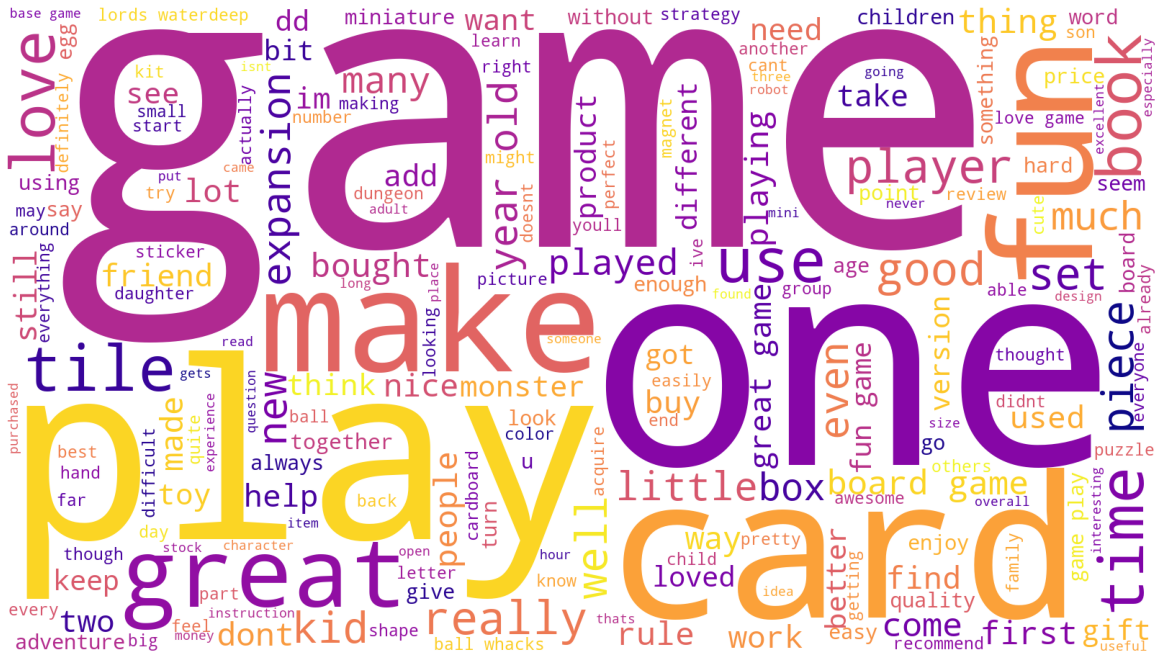

In [99]:
# Plot the wordcloud image.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


### 4d) Identify 15 most common words and polarity

In [100]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist1 = FreqDist(tokens)

# Preview the data.
fdist1 

FreqDist({'game': 3343, 'great': 1160, 'fun': 1104, 'one': 1060, 'play': 1004, 'like': 828, 'love': 647, 'really': 638, 'get': 638, 'cards': 602, ...})

In [101]:
# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,3343
great,1160
fun,1104
one,1060
play,1004
like,828
love,647
really,638
get,638


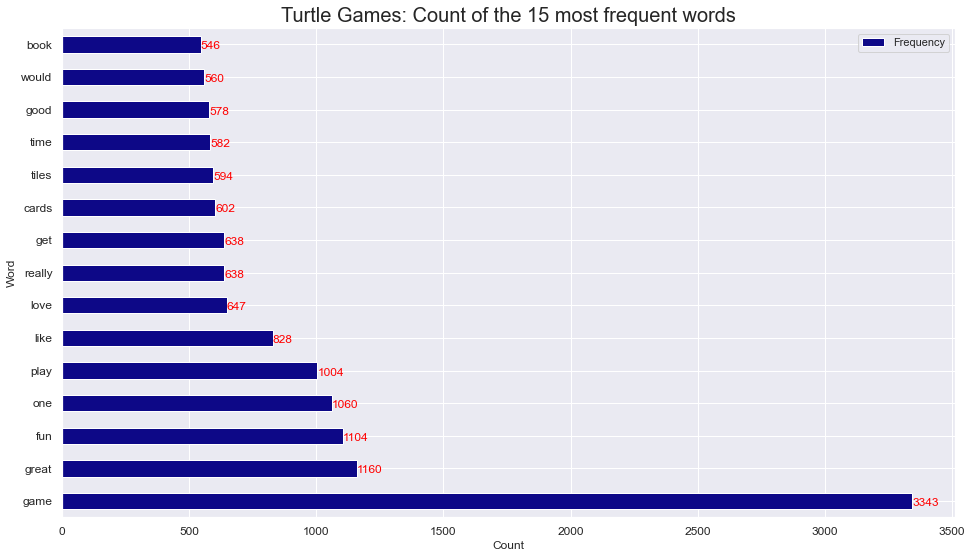

In [102]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 